<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png"
width="250" height="250">
</img>
<br>
<i><b>Docente:</b> Juan Pablo Ospina Lopez.</i>
<br>
<i><b>Asignatura:</b> Inteligencia Artificial</i>
<br>
<i><b>Estudiante:</b> Chiara Valenzuela</i>
<br>
<i><b>Tema:</b> Laboratorio 2. Búsqueda no informada</i>
<br>
<i>31/08/23</i>
</FONT>
</p>

# __Laboratorio 2: Búsqueda no informada__

El siguiente taller de corresponde a la aplicación de algoritmos de búsqueda no informada en la solución de problemas en inteligencia artificial. Para el desarrollo del laboratorio tenga en cuenta lo siguiente:

* La actividad puede realizarse en grupos de máximo 4 personas
* La solución al taller debe enviarse en un notebook a través de Moodle. Se debe adjuntar el archivo. No se aceptan enlaces
* El objetivo del taller es hacer énfasis en el proceso de modelamiento. Por esta razón se deben utilizar como base para la soluciones propuestas las clases y métodos disponibles en la sección recursos. __Otras implementaciones no serán tenidas en cuenta__.
* Si se detecta cualquier tipo de fraude, la calificación de 0.0.
* El taller deberá ser sustentando por uno de los miembros del grupo
* Las soluciones propuestas deben cumplir con las recomendaciones de código limpio especificadas en el [PEP8](https://pep8.org/), de lo contrario será penalizado

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## __0. Recursos__

La clase abstracta `SearchProblem` servirá como una plantilla general para el proceso de formulación del problema como un problema de búsqueda. Cualquier implementación deberá heredar de esta clase

In [2]:
class SearchProblem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial, goal=None, **kwds):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

    def actions(self, node):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, node, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def is_goal(self, node):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        return self.goal == node

    def action_cost(self, s, a, s1):
        """Return the cost of a solution path that arrives at state s1 from
        state s via action a. If the problem
        is such that the path doesn't matter, this function will only look at
        state s1.  If the path does matter, it will consider state s1
        and action a. The default method costs 1 for every step in the path."""
        return 1

También es posible implementar la clase abstracta `Node` para representar los posibles estados del problemas.

In [7]:
class Node:
  def __init__(self, state='', parent=None, action=None, cost=1):
    self.state = state
    self.parent = parent
    self.action = action

  def states_path(self):
    'The requiered sequence of states to get this node'
    if self.parent == None:
      return [self]
    return self.parent.states_path() + [self]

  def actions_path(self):
    'The required sequence of actions to get this node'
    if self.parent == None:
      return []
    return self.parent.actions_path() + [self.action]

  def __eq__(self, node):
    if isinstance(node, Node):
      return self.state == node.state
    return False

  def __repr__(self):
    return str(self.state)

Una implementación de los algoritmos `BFS` y `DFS` tal como se vió en clase.

In [15]:
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs

closedBFS = []
closedBFS.clear()
def BFS(problem, fringe = []):
    fringe.append(problem.initial)

    while True:
        if not fringe:
            return 'FAILURE'
        node = fringe.pop(0)
        if problem.is_goal(node):
            return node
        if node not in closedBFS:
            closedBFS.append(node)
            for child in expand(problem, node):
                fringe.append(child)

closedDFS = []
closedDFS.clear()
def DFS(problem, fringe = []):
    fringe.append(problem.initial)
    while True:
        if not fringe:
            return 'FAILURE'
        node = fringe.pop()
        if problem.is_goal(node):
            return node
        if node not in closedDFS:
            closedDFS.append(node)
            for child in expand(problem, node):
                fringe.append(child)


## __1. (1.0 puntos) Ranas Saltarinas__

En este juego el estado inicial se define como una secuencia de cuadrados con `N` ranas azules a la izquierda, luego un cuadrado vacío y luego `N` ranas de color rojo a la derecha. La figura presenta un ejemplo para `N=2`. Representaremos el estado del juego como la cadena `'AA.RR'`. El objetivo es intercambiar las piezas, llegando al estado `'RR.AA'`. Una pieza `'A'` se mueve de izquierda a derecha, ya sea deslizándose un espacio hacia adelante cuando el siguiente espacio está vacío, o se mueve dos espacios hacia adelante si el segundo espacio está vacío y hay una `'R'` en el medio para saltar. Las piezas `'R'` se mueven de derecha a izquierda de la misma forma. En este caso, definiremos una acción como una pareja `(i, j)` que representa intercambiar las piezas en esas posiciones. Por ejemplo, Las acciones disponibles para el estado presentado en la figura serán: `{(1, 2), (3, 2)}`. La rana azul en la posición `1` o la rana roja en la posición `3` pueden intercambiar lugares con el espacio en blanco en la posición `2`.


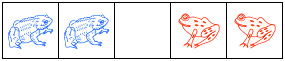



In [16]:
class ranitas(SearchProblem):

  def actions(self, node):
    lista_caracteres = list(node.state)
    possible_actions = []
    for posicion, rana in enumerate(lista_caracteres):
      if rana == "R" and posicion > 0:
        if lista_caracteres[posicion - 1] == "." :
          possible_actions.append((posicion, posicion - 1))
      if rana == "R" and posicion > 1:
        if lista_caracteres[posicion - 1] == "A" and lista_caracteres[posicion - 2] == ".":
          possible_actions.append((posicion, posicion - 2))
      if rana == "A" and posicion < 4:
        if lista_caracteres[posicion + 1] == "." :
          possible_actions.append((posicion, posicion + 1))
      if rana == "A" and posicion < 3:
        if lista_caracteres[posicion + 1] == "R" and lista_caracteres[posicion + 2] == ".":
          possible_actions.append((posicion, posicion + 2))

    return possible_actions

  def result(self, node, action):
    lista_caracteres = list(node.state)

    lista_caracteres[action[0]], lista_caracteres[action[1]] = lista_caracteres[action[1]], lista_caracteres[action[0]]

    new_state = "".join(map(str, lista_caracteres))
    new_node = Node(state=new_state, parent=node, action=action, cost=1)
    return new_node

In [17]:
S_o = Node('AA.RR')
Final = Node('RR.AA')

juego = ranitas(S_o, Final)

# Por ultimo se muestran los resultados
print("******** RESULTADO BFS **********\n")
solution1 = BFS(juego)
print(solution1.states_path())
print(solution1.actions_path())

print("\n******** RESULTADO DFS **********\n")
solution2 = DFS(juego)
print(solution2.states_path())
print(solution2.actions_path())

******** RESULTADO BFS **********

[AA.RR, A.ARR, ARA.R, ARAR., AR.RA, .RARA, R.ARA, RRA.A, RR.AA]
[(1, 2), (3, 1), (4, 3), (2, 4), (0, 2), (1, 0), (3, 1), (2, 3)]

******** RESULTADO DFS **********

[AA.RR, AAR.R, A.RAR, .ARAR, RA.AR, RARA., RAR.A, R.RAA, RR.AA]
[(3, 2), (1, 3), (0, 1), (2, 0), (4, 2), (3, 4), (1, 3), (2, 1)]


## __2. (1.0 puntos) Problema de las Jarras de agua__

Usted tiene 2 jarras, una con capacidad de 3 litros y otra con capacidad de 5 litros. Además, cuenta con un grifo el cuál puede utilizar para llenar las jarras cuando lo requiera. Las jarras se pueden llenar totalmente o vaciar su contenido en el piso. También se puede vaciar el contenido de una jarra en la otra. Las jarras no tienen ninguna clase de marca. El objetivo es medir exactamente cuatro litros de agua. Considere el estado inicial como tener las dos jarras vacias.

* Construya una clase que herede de la clase `SearchProblem` para representar el problema
* Construya una clase que herede de la clase `Node` para representar las jarras
* Encuentre la solución al problema utilizando los algoritmos BFS y DFS
* Genere un gráfico de barras donde compare la cantidad de nodos expandidos por ambos algoritmos


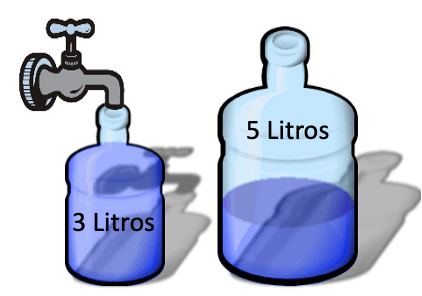




In [18]:
class Jarras (SearchProblem):

  #se definen las acciones como vaciar, llenar y mover de una jarra a otra
  def actions(self, node=(0,0)):

    """
    cada estado de las jarras, se le obtiene su lista de acciones posibles,
    el estado inicial se considera (0,0) siendo la primera posicion de la
    tupla la cantidad de litros de agua de la jarra de 3 litros, y la segunda
    posicion corresponde  a la jarra de 5 litros.

    """

    actions_list = []

    # llenar una jarra
    if node.state[0] < 3:
      actions_list.append('llenar_3')
    if node.state[1] < 5:
      actions_list.append('llenar_5')

    # Vaciar una jarra
    if node.state[0] > 0:
      actions_list.append('vaciar_3')
    if node.state[1] > 0:
      actions_list.append('vaciar_5')

    # mover de una jarra a otra
    if node.state[0] > 0 and node.state[1] < 5:
      actions_list.append('mover_3_a_5')
    if node.state[1] > 0 and node.state[0] < 3:
      actions_list.append('mover_5_a_3')

    # mover 1 litro entre las jarras
    if node.state[0] >= 1 and node.state[1] < 5:
      actions_list.append('mover_1_a_5')
    if node.state[1] >= 1 and node.state[0] < 3:
      actions_list.append('mover_1_a_3')

    return actions_list

  def result(self, node, action):


        actions_result = {
            "llenar_3": (3, node.state[1]),
            "llenar_5": (node.state[0], 5),
            "vaciar_3": (0, node.state[1]),
            "vaciar_5": (node.state[0], 0),
            "mover_3_a_5": (max(node.state[0] - (5 - node.state[1]), 0), min(node.state[1] + node.state[0], 5)),
            "mover_5_a_3": (min(node.state[0] + node.state[1], 3), max(node.state[1] - (3 - node.state[0]), 0)),
            "mover_1_a_5": (node.state[0], min(node.state[1] + 1, 5)),
            "mover_1_a_3": (min(node.state[0] + 1, 3), node.state[1])
        }

        new_state = actions_result[action]
        new_node = Node(state=new_state, parent=node, action=action, cost=1)
        return new_node

In [20]:
# Para prueba, se escoge un estado inicial (start)
# y un estado objetivo (goal) con base en el ejercicio
start = Node(state=(0,0))
goal_e = Node(state=(0,4))

juego2 = Jarras(initial = start, goal = goal_e)

print("******** RESULTADO BFS **********\n")
solution1 = BFS(juego2)
print('Cantidad de acciones hechas: ',len(solution1.actions_path()))
print(solution1.states_path())
print(solution1.actions_path())
print("\n******** RESULTADO DFS **********\n")
solution2 = DFS(juego2)
print('Cantidad de acciones hechas: ',len(solution2.actions_path()))
print(solution2.states_path())
print(solution2.actions_path())

******** RESULTADO BFS **********

Cantidad de acciones hechas:  3
[(0, 0), (3, 0), (3, 1), (0, 4)]
['llenar_3', 'mover_1_a_5', 'mover_3_a_5']

******** RESULTADO DFS **********

Cantidad de acciones hechas:  10
[(0, 0), (0, 5), (1, 5), (2, 5), (3, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (0, 4)]
['llenar_5', 'mover_1_a_3', 'mover_1_a_3', 'mover_1_a_3', 'vaciar_5', 'mover_1_a_5', 'mover_1_a_5', 'mover_1_a_5', 'mover_1_a_5', 'vaciar_3']


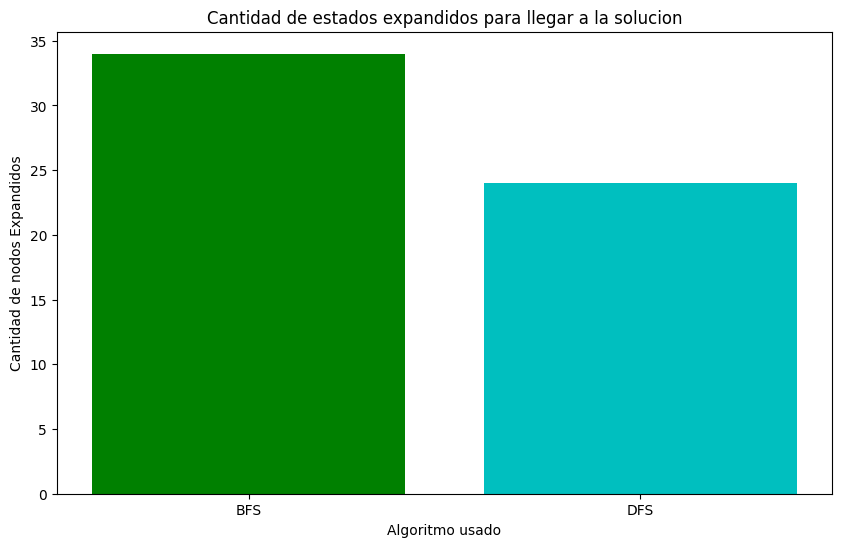

In [21]:
plt.figure(figsize=(10,6))
plt.title("Cantidad de estados expandidos para llegar a la solucion")
plt.xlabel("Algoritmo usado")
plt.ylabel("Cantidad de nodos Expandidos")
plt.bar(["BFS","DFS"],[len(closedBFS),len(closedDFS)],color = ['g', 'c'])
plt.show()

## __3. (2.0 puntos) Canibales y misioneros__

Tres misioneros y tres caníbales deben cruzar un río usando un bote que puede llevar una o dos personas. Sin embargo, para cruzar el rio se deben tener en cuenta dos restricciones: primero, si hay misioneros presentes en un lado, no pueden ser superados en número por los caníbales (¡si esto ocurriera, los caníbales se comerían a los misioneros!). Segundo, el barco no puede cruzar el río vacio. Su objetivo es modelar esta situación como un problema de búsqueda y resolverlo usando BFS y DFS. Para esto:

* Construya una clase que herede de la clase `SearchProblem` para representar el problema
* Construya una clase que herede de la clase `Node` para representar los estados
* Genere un gráfico de barras donde compare la cantidad de nodos expandidos por ambos algoritmos

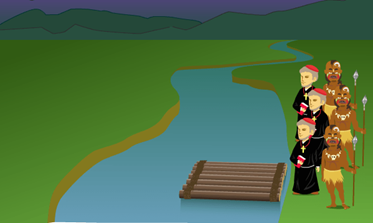


In [22]:
class Grafo_Solucion(SearchProblem):

    def actions(self, node):
        actions = {

                'S': ['m-B', 'm-Z'],     #(3,3) ESTADO INICIAL
                'A': ['m-D'],            #(2,3)
                'B': ['m-A', 'm-C'],     #(1,3)
                'D': ['m-B'],            #(0,3)
                'C': ['m-F'],            #(1,1)
                'Z': ['m-A', 'm-X'],     #(2,2)
                'F': ['m-X'],            #(2,2)
                'X': ['m-K'],            #(2,0)
                'K': ['m-E'],            #(3,0)
                'E': ['m-G','m-H','m-G'],#(1,0)
                'H': ['m-E','m-G'],      #(1,1)
                'U': ['m-G'],            #(2,0)
        }

        return actions.get(node.state, [])

    def result(self, node, action):
        new_state = {
                'm-A': 'A',
                'm-B': 'B',
                'm-D': 'D',
                'm-C': 'C',
                'm-Z': 'Z',
                'm-X': 'X',
                'm-F': 'F',
                'm-K': 'K',
                'm-E': 'E',
                'm-H': 'H',
                'm-U': 'U',
                'm-G': 'G'
        }
        return Node(state=new_state[action], parent=node, action=action)

    def is_goal(self, node):
        return node == self.goal

In [23]:
S = Node(state='S')
G = Node(state='G')

grafo_solucion = Grafo_Solucion(initial=S, goal=G)

print("BFS")
solution = BFS(grafo_solucion)
print('Secuencia de estados:', solution.states_path())
print('Accion de secuencias:', solution.actions_path(), "\n")

solution2 = DFS(grafo_solucion)

print("DFS")
print('Secuencia de estados:',solution2.states_path())
print('Accion de secuencias:',solution2.actions_path())

BFS
Secuencia de estados: [S, Z, X, K, E, G]
Accion de secuencias: ['m-Z', 'm-X', 'm-K', 'm-E', 'm-G'] 

DFS
Secuencia de estados: [S, Z, X, K, E, G]
Accion de secuencias: ['m-Z', 'm-X', 'm-K', 'm-E', 'm-G']


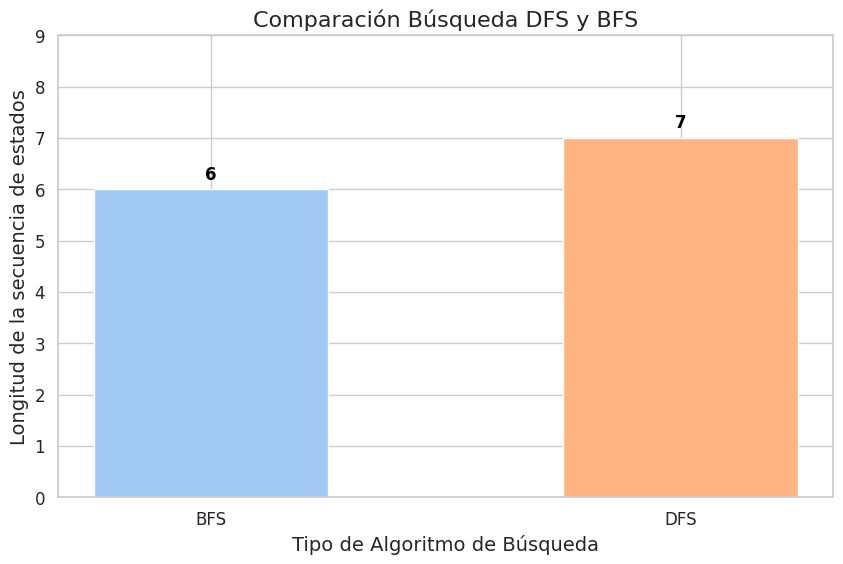

In [24]:
# Definición de nodos
S = Node(state='S')
Y = Node(state='G')

# Creación del grafo de solución
grafo_solucion = Grafo_Solucion(initial=S, goal=G)

# Cálculo de las soluciones
solution = BFS(grafo_solucion)
solution2 = DFS(grafo_solucion)

# Preparación de datos para la gráfica
algoritmos = ["BFS", "DFS"]
longitudes = [len(solution.states_path()), len(solution2.states_path())]
colores = sns.color_palette("pastel")  # Paleta de colores pastel de seaborn

# Estilo de la gráfica
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Creación de la gráfica
bars = plt.bar(algoritmos, longitudes, color=colores, width=0.5)

# Etiquetas en las barras
for bar, length in zip(bars, longitudes):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        length + 0.2,
        str(length),
        ha='center',
        color='black',
        fontweight='bold'
    )

# Configuración de ejes y mostrar la gráfica
plt.title('Comparación Búsqueda DFS y BFS', fontsize=16)
plt.xlabel('Tipo de Algoritmo de Búsqueda', fontsize=14)
plt.ylabel('Longitud de la secuencia de estados', fontsize=14)
plt.ylim(0, max(longitudes) + 2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar la gráfica
plt.show()

## __3. (1.0 puntos) Pacman: search__

Solucione las 2 primeras preguntas del proyecto [Pacman - Search](https://inst.eecs.berkeley.edu/~cs188/sp23/projects/proj1/). Adjunte el código utilizado para BFS, DFS y una imagen donde se evidencie la aprobación de los casos de prueba para cada pregunta.

In [ ]:
# código propuesto para DFS
def depthFirstSearch(problem: SearchProblem):

    closed =[]
    fringe =  Stack()
    fringe.push((problem.getStartState(),[]))

    while not fringe.isEmpty():
        if not fringe:
            return 'FAILURE'
        node , actions = fringe.pop()
        if problem.isGoalState(node):
            return actions
        if node not in closed:
            closed.append(node)
            for child, action , cost in problem.getSuccessors(node):
                newAction = actions + [action]
                fringe.push((child,newAction))

In [ ]:
# código propuesto para BFS
def breadthFirstSearch(problem: SearchProblem):
    """Search the shallowest nodes in the search tree first."""
    from util import Queue

    # Inicialización de la cola para la frontera
    frontier = Queue()
    # Agregar el estado inicial a la frontera con ruta y acciones iniciales
    frontier.push((problem.getStartState(), [], []))
    # Inicialización del conjunto para mantener estados visitados
    visited = set()

    while not frontier.isEmpty():
        state, route, actions = frontier.pop()

        # Si el estado es el objetivo, devolver la lista de acciones
        if problem.isGoalState(state):
            return actions

        # Si el estado no está en los estados visitados, expandir el nodo
        if state not in visited:
            visited.add(state)

            # Obtener sucesores del estado actual y agregarlos a la frontera
            for next_state, action, cost in problem.getSuccessors(state):
                next_route = route + [next_state]
                next_actions = actions + [action]
                frontier.push((next_state, next_route, next_actions))

    return []  # Si no se encuentra una solución, devolver una lista vacía
    util.raiseNotDefined()

# imagen con los casos de prueba

#### PRUEBA DFS
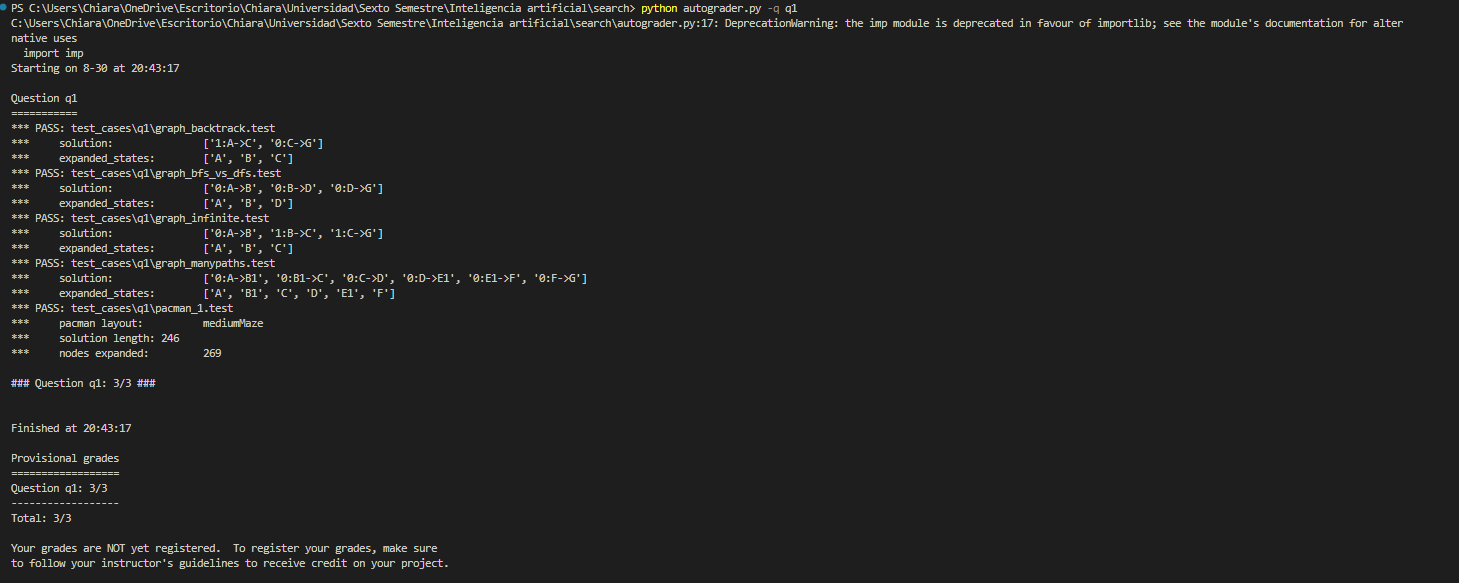

###PRUEBA BFS
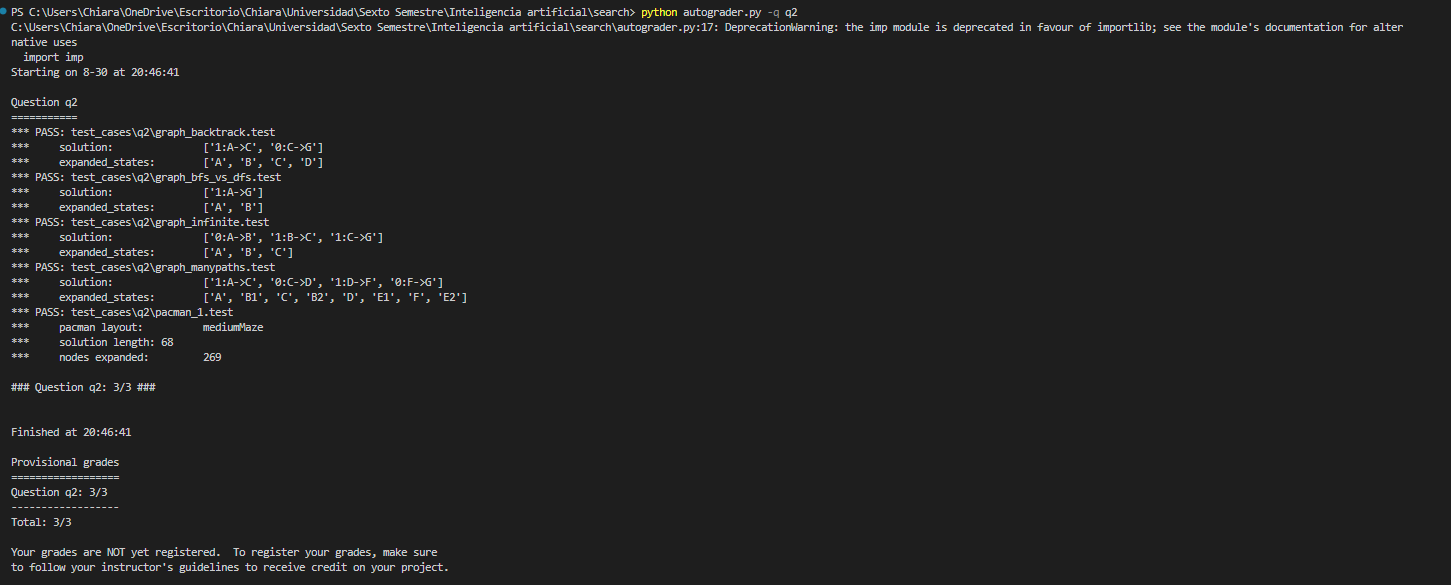